# "Music Analysis Project"
> "Analysis of Music Data from the Corgis Music Dataset. Investigating possible correlations between song characteristics and song popularity, and further investigation of artist popularity in respective geographic locations."

- toc: true
- branch: master
- badges: true
- comments: true
- author: Alexandra Lansing & Brandon Chi
- categories: [fastpages, jupyter]

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
musicDF=pd.read_csv('music.csv')

In [8]:
print("Dimensions of the dataframe")
musicDF.shape

Dimensions of the dataframe


(10000, 35)

In [9]:
print("First 5 rows: ")
musicDF.head()

First 5 rows: 


,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
2,0.487357,0.343428,ARKRRTF1187B9984DA,0.00000,0,0.00000,Sonora Santanera,0.0,salsa,1.000000,...,1,0.565,172.304,0.482,0.42132,100.070,1.0,0.000,0,0
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007


In [10]:
print("Last 5 rows: ")
musicDF.tail()

Last 5 rows: 


,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
9995,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,0,-7.84481,Moonspell,0.0,sympho black metal,0.999765,...,1,0.540,386.194,0.224,0.22262,140.185,4.0,0.099,0,1998
9996,0.511663,0.409779,AR9JLBU1187B9AAEC4,-33.96243,0,25.62326,Danny Williams,0.0,ballad,0.915417,...,1,0.398,163.463,0.604,0.07692,77.072,3.0,0.597,0,1998
9997,0.433508,0.289903,ARS1DCR1187B9A4A56,0.00000,0,0.00000,Winston Reedy,0.0,lovers rock,0.960115,...,1,0.565,186.015,1.000,0.27924,118.123,4.0,0.205,0,0
9998,0.334457,0.216829,ARAGMIV11F4C843F78,0.00000,0,0.00000,"Myrick ""Freeze"" Guillory",0.0,zydeco,1.000000,...,1,0.503,300.826,0.421,0.28192,137.663,4.0,0.000,0,0
9999,0.609182,0.509243,ARYXOV81187B99831D,0.00000,0,0.00000,Seventh Day Slumber,0.0,christian rock,0.926220,...,0,0.406,193.167,0.710,0.20535,150.575,4.0,0.317,0,2005


In [11]:
print("Column names")
musicDF.columns

Column names


Index(['artist.familiarity', 'artist.hotttnesss', 'artist.id',
       'artist.latitude', 'artist.location', 'artist.longitude', 'artist.name',
       'artist.similar', 'artist.terms', 'artist.terms_freq', 'release.id',
       'release.name', 'song.artist_mbtags', 'song.artist_mbtags_count',
       'song.bars_confidence', 'song.bars_start', 'song.beats_confidence',
       'song.beats_start', 'song.duration', 'song.end_of_fade_in',
       'song.hotttnesss', 'song.id', 'song.key', 'song.key_confidence',
       'song.loudness', 'song.mode', 'song.mode_confidence',
       'song.start_of_fade_out', 'song.tatums_confidence', 'song.tatums_start',
       'song.tempo', 'song.time_signature', 'song.time_signature_confidence',
       'song.title', 'song.year'],
      dtype='object')

In [12]:
musicDF.describe()

,artist.familiarity,artist.hotttnesss,artist.latitude,artist.location,artist.longitude,artist.similar,artist.terms_freq,release.id,release.name,song.artist_mbtags,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
count,10000.000000,10000.000000,10000.000000,10000.000,10000.000000,10000.0,1.000000e+04,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.565230,0.385552,13.904283,0.078,-23.923863,0.0,2.248903e+02,371024.058400,23.096000,0.000033,...,0.691000,0.477765,229.883436,0.507875,0.299886,122.900913,3.564443,0.599785,10.011400,934.704600
std,0.160528,0.143647,20.356379,7.800,43.723359,0.0,2.239216e+04,236777.828209,1322.901526,0.003330,...,0.462104,0.191269,112.024303,0.332357,0.510925,35.204746,1.266620,8.991567,945.486852,996.650657
min,0.000000,0.000000,-41.280540,0.000,-162.436500,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,-21.394000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467570,0.325266,0.000000,0.000,-73.948880,0.0,9.476125e-01,172858.000000,0.000000,0.000000,...,0.000000,0.360000,168.855750,0.237000,0.110692,96.959500,3.000000,0.097750,0.000000,0.000000
50%,0.563584,0.380742,0.000000,0.000,0.000000,0.0,9.999728e-01,333103.000000,0.000000,0.000000,...,1.000000,0.487000,213.864500,0.500000,0.191520,120.156500,4.000000,0.551000,0.000000,0.000000
75%,0.668020,0.453858,34.419250,0.000,0.000000,0.0,1.000000e+00,573532.500000,0.000000,0.000000,...,1.000000,0.606000,266.274750,0.774250,0.294743,144.006750,4.000000,0.864000,0.000000,2000.000000
max,1.000000,1.082503,69.651020,780.000,174.767140,0.0,2.239217e+06,823599.000000,85555.000000,0.333000,...,1.000000,1.000000,1813.426000,9.227560,12.245830,262.828000,7.000000,898.891000,94496.000000,2010.000000


In [13]:
musicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   artist.familiarity              10000 non-null  float64
 1   artist.hotttnesss               10000 non-null  float64
 2   artist.id                       10000 non-null  object 
 3   artist.latitude                 10000 non-null  float64
 4   artist.location                 10000 non-null  int64  
 5   artist.longitude                10000 non-null  float64
 6   artist.name                     10000 non-null  object 
 7   artist.similar                  10000 non-null  float64
 8   artist.terms                    9995 non-null   object 
 9   artist.terms_freq               10000 non-null  float64
 10  release.id                      10000 non-null  int64  
 11  release.name                    10000 non-null  int64  
 12  song.artist_mbtags              1

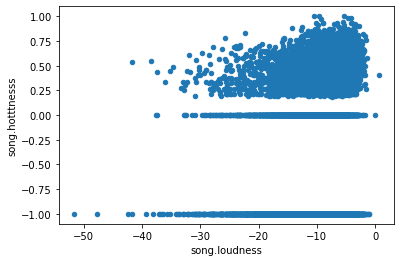

In [14]:
musicDF.plot(kind='scatter',x='song.loudness',y='song.hotttnesss');
# This scatter has a very undtraditional shape but we think it is important to notice that there seems to be some
# slight hinting towards higher values of song.loudness associated with popularity. As you can see there are songs
# that have the same loudness as others but are not nearly as popular so loudness isn't the only characteristic
# we can base our analysis off of but for the most part, the more popular songs tend to have a loudness rating
# from [-10,0]

<AxesSubplot:>

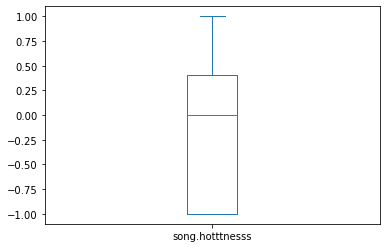

In [15]:
musicDF['song.hotttnesss'].plot(kind='box')
#In this box plot, it appears that the median measurement of song popularity lies at 0,
#and the minimum lies at the first quartile, -1. The third quartile is seen at about 0.35,
#and the maximum is 1. It seems as though the first quartile has a larger range than the third quartile.
#Outliers are expected to be seen in the first quartile range and also at the maximum.

Text(0.5, 1.0, 'Linear Regression of song tempo in comparison to artist hotttness rating')

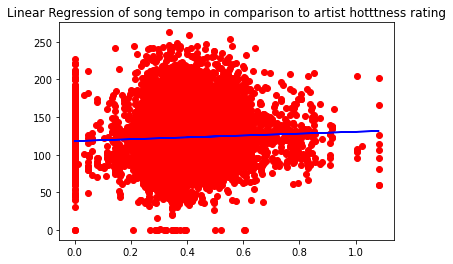

In [16]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = musicDF[['artist.hotttnesss']]
y = musicDF['song.tempo']
reg = LinearRegression().fit(X, y)
ytrain = reg.intercept_ + reg.coef_ * X
plt.plot(X,y,'ro',X,ytrain,'b-')
plt.title("Linear Regression of song tempo in comparison to artist hotttness rating")
# We ran a linear regression comparing the correlation between artist hotttnesss and the tempo of a song.
# Depicted below we see that the fitting line almost has a slope of 0 and we can see that the surrounding
# points don't really trend to have y=x or y=-x shape making it difficult to make the conclusion that 
# a songs tempo influences the artist hotttness rating that much. Almost resembling a constant y=C shape
# makes us think that we have to do some sort of analysis with a combination of different song characteristics
# to find a more convincing correlation. 

<AxesSubplot:title={'center':'song tempo vs. arist name'}, xlabel='artist.name', ylabel='song tempo'>

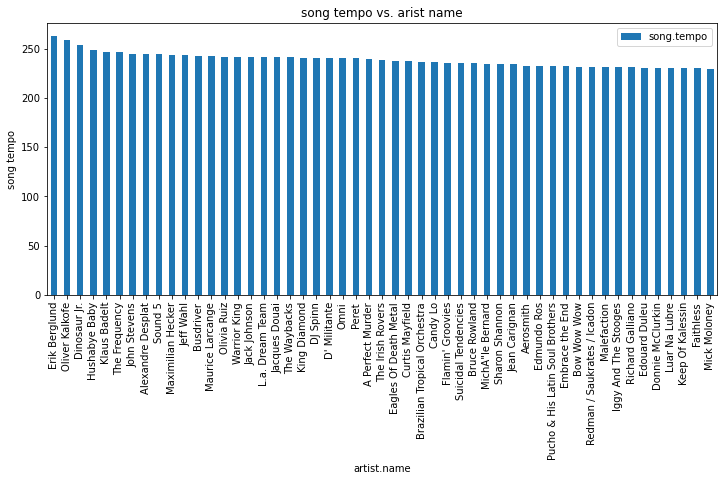

In [17]:
tempoDF = musicDF.sort_values(by='song.tempo', ascending=False).reset_index()
barData = tempoDF.loc[0:50,['song.tempo','artist.name']]
barData.plot(kind='bar',
             x='artist.name',
             y='song.tempo',
             figsize=(12,5),
            ylabel="song tempo",
            title="song tempo vs. arist name")
# We first sorted the songs by tempo (a little over 250 seems to be the fastest song that this dataset has).
# Then we made a bar plot showing the artist's name assoicated with the fastest song. This information should be 
# used in combination with the rest of the data as we have artists with the fastest songs and we want to see 
# if maybe there is some correlation between the speed of a song and the overall popularity ranking. For additional
# analysis we will run tests on the artists themselves to see if they are popular.

<AxesSubplot:xlabel='song.hotttnesss', ylabel='song.duration'>

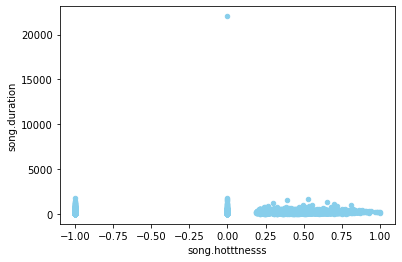

In [18]:
musicDF.plot(kind='scatter', x='song.hotttnesss', y='song.duration', color='skyblue')

In [19]:
musicDF['song.hotttnesss'] 
music_df_song_h= musicDF[musicDF['song.hotttnesss'] > 0.0]

<AxesSubplot:xlabel='song.hotttnesss', ylabel='song.duration'>

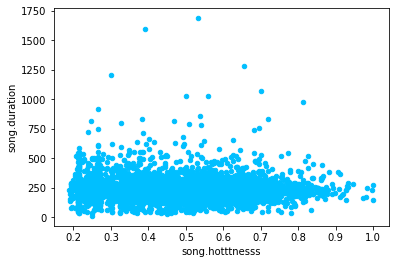

In [20]:
music_df_song_h.plot(kind='scatter', x='song.hotttnesss', y='song.duration', color='deepskyblue')

In [21]:
musicDF['artist.hotttnesss'] 

0       0.401998
1       0.417500
2       0.343428
3       0.454231
4       0.401724
          ...   
9995    0.499826
9996    0.409779
9997    0.289903
9998    0.216829
9999    0.509243
Name: artist.hotttnesss, Length: 10000, dtype: float64

<AxesSubplot:xlabel='artist.hotttnesss', ylabel='song.duration'>

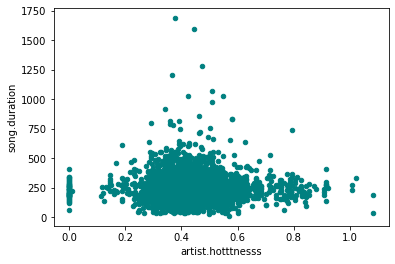

In [22]:
music_df_song_h.plot(kind='scatter', x='artist.hotttnesss', y='song.duration', color='teal')

In [23]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

0      38.89910
1      41.88415
2      49.26044
3      42.33168
4      54.31407
         ...   
369    39.37413
370    43.64856
371    29.78772
372    37.16793
373    35.22250
Name: artist.latitude, Length: 374, dtype: float64


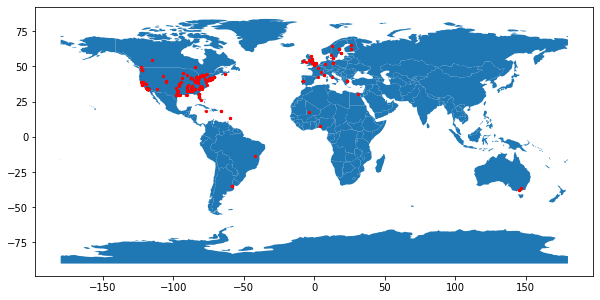

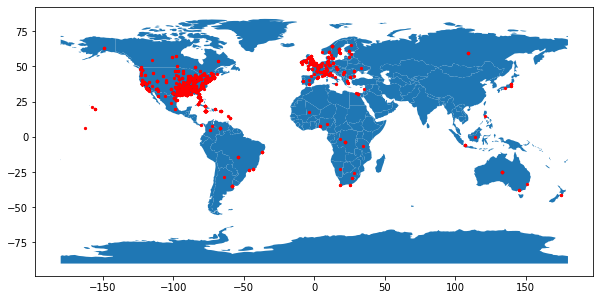

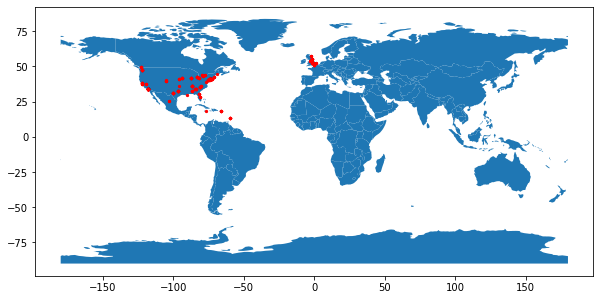

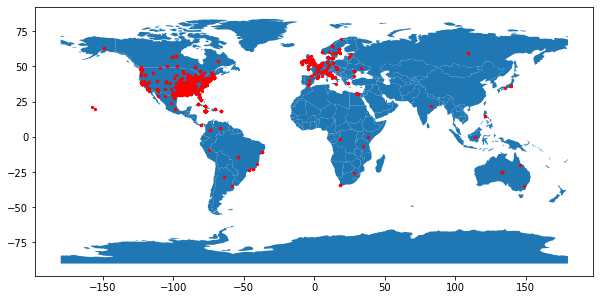

In [24]:

def filterLatLong(d):
    latLongDF = d[d['artist.latitude'] != 0.0]
    latLongDF = latLongDF[latLongDF['artist.longitude'] != 0.0]
    return latLongDF.reset_index()
music_df = filterLatLong(musicDF)
song_df = music_df.sort_values('song.hotttnesss', axis=0, ascending=False, inplace=False).reset_index(drop=True)
artist_df = music_df.sort_values('artist.hotttnesss', axis=0, ascending=False, inplace=False).reset_index(drop=True)
# top 10%
top10PercentSong = song_df.head(int(len(song_df) * .1))
restSong = song_df.tail(int(len(song_df)*.5))

print(top10PercentSong['artist.latitude'])

top10PercentArtist = artist_df.head(int(len(song_df) * .1))
restArtist = artist_df.tail(int(len(song_df)*.5))

def createMap(df):
    geometry = [Point(xy) for xy in zip(df['artist.longitude'], df['artist.latitude'])]
    gdf = GeoDataFrame(df, geometry=geometry)  
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=5)

createMap(top10PercentSong)
createMap(restSong)
createMap(top10PercentArtist)
createMap(restArtist)



In [25]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [26]:
def getLocationFromCoordinates(lat,long): #takes in lat and long as a float => converts to string
    location = geolocator.reverse(str(lat) + ',' + str(long))
    return location

def getStateCountryName():
    dFreq={}
    for k,v in top10PercentSong.iterrows():
        location = getLocationFromCoordinates(v['artist.latitude'],v['artist.longitude'])
        if location != None:
            splitLocation = location[0].split(',')
            stateCountryInd = len(splitLocation)-3
            dFreq[splitLocation[stateCountryInd]] = dFreq[splitLocation[stateCountryInd]] + 1 if splitLocation[stateCountryInd] in dFreq else 1
    return dFreq
print(getStateCountryName())
#{' District of Columbia': 1, ' Illinois': 12, ' British Columbia': 4, ' Michigan': 8, ' England': 48, ' North Carolina': 4, ' Ontario': 7, ' Surrey County': 1, ' Tennessee': 8, ' New York': 43, ' California': 72, ' France métropolitaine': 5, ' Massachusetts': 5, ' Colorado': 2, ' Alabama': 7, ' Arkansas': 1, ' Skåne län': 3, ' Minnesota': 3, ' Puerto Rico': 2, ' Georgia': 7, 'Montgomery County': 6, ' Pennsylvania': 4, ' Victoria': 3, ' Washington': 6, ' Nova Scotia': 2, ' New Jersey': 8, ' Connecticut': 4, ' Florida': 8, ' Woodlands County': 1, ' Iowa': 2, ' Bahia': 1, ' Sundsvalls kommun': 4, ' Texas': 12, ' Wisconsin': 1, 'Fresno County': 2, ' Leinster': 1, ' Αποκεντρωμένη Διοίκηση Θεσσαλίας - Στερεάς Ελλάδος': 6, ' Saint Michael': 2, ' Oklahoma': 2, ' Northeastern Ontario': 2, ' County Roscommon': 3, ' Ohio': 7, ' Mississippi': 3, ' Mação': 3, ' Missouri': 2, ' Alba / Scotland': 2, ' Oyo': 2, ' Indiana': 1, ' Auvergne-Rhône-Alpes': 1, ' Berlin': 3, 'Yavapai County': 1, ' West Virginia': 2, ' Park County': 1, ' Pohjois-Suomen aluehallintovirasto': 2, ' Stockholms län': 2, ' Manner-Suomi': 2, ' القاهرة': 1, ' Umbria': 1, 'Fremont County': 1, ' Ciudad Autónoma de Buenos Aires': 4, ' Louisiana': 2, ' Grong': 1, 'Cercle de Goundam': 1, ' Virginia': 1, ' South Carolina': 2, ' West Midlands': 1, ' Nordrhein-Westfalen': 1, ' Västra Götalands län': 1}


KeyboardInterrupt: 